# Using deep features to train an image classifier

In [1]:
import turicreate

# Load some data

In [3]:
image_train = turicreate.SFrame('image_train_data/')
image_test = turicreate.SFrame('image_test_data/')

# Explore this image data

/home/n/miniconda3/lib/python3.7/site-packages/turicreate/visualization/_plot.py:461: UserWarning: Displaying only the first 100 rows.
  warnings.warn("Displaying only the first {} rows.".format(maximum_rows))



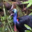
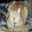
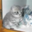
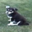
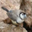
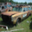
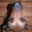
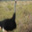
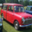
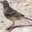
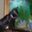
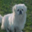
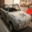
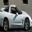
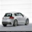
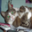
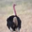
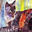
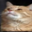
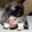
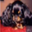
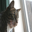
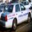
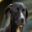
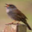
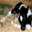
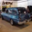
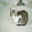
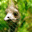
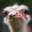
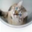
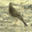
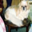
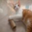
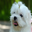
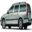
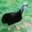
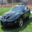
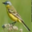
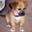
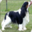
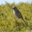
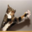
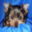
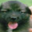
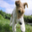
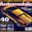
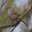
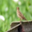
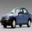
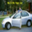
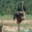
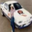
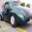
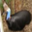
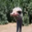
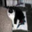
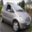
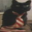
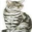
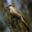
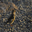
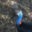
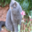
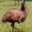
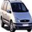
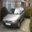
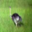
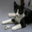
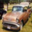
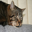
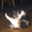
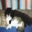
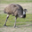
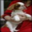
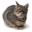
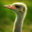
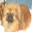
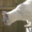
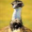
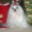
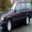
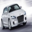
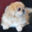
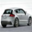
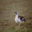
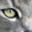
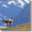
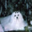
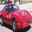
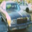
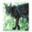
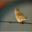
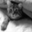
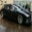
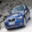
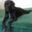
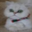
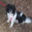
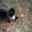

In [4]:
image_train['image'].explore()

# Train an image classifier on raw image pixels

In [5]:
raw_pixel_model = turicreate.logistic_classifier.create(image_train,
                                                       target = 'label',
                                                       features = ['image_array'])

PROGRESS: Creating a validation set from 5 percent of training data. This may take a while.
          You can set ``validation_set=None`` to disable validation tracking.



Logistic regression:

--------------------------------------------------------

Number of examples          : 1904

Number of classes           : 4

Number of feature columns   : 1

Number of unpacked features : 3072

Number of coefficients      : 9219

Starting L-BFGS

--------------------------------------------------------

+-----------+----------+-----------+--------------+-------------------+---------------------+

| Iteration | Passes   | Step size | Elapsed Time | Training Accuracy | Validation Accuracy |

+-----------+----------+-----------+--------------+-------------------+---------------------+

| 0         | 5        | 0.028077  | 1.231687     | 0.349790          | 0.376238            |

| 1         | 10       | 2.386566  | 1.455639     | 0.385504          | 0.316832            |

| 2         | 11       | 2.386566  | 1.541930     | 0.435399          | 0.445545            |

| 3         | 18       | 0.407681  | 1.845278     | 0.451155          | 0.376238            |

| 4         | 24       | 1.642487  | 2.106579     | 0.455357          | 0.396040            |

| 9         | 39       | 3.767619  | 2.858451     | 0.520483          | 0.475248            |

+-----------+----------+-----------+--------------+-------------------+---------------------+

# Make predictions using simple raw pixel model


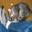
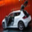
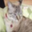

In [6]:
image_test[0:3]['image'].explore()

In [7]:
image_test[0:3]['label']

dtype: str
Rows: 3
['cat', 'automobile', 'cat']

In [8]:
raw_pixel_model.predict(image_test[0:3])

dtype: str
Rows: 3
['bird', 'cat', 'bird']

# Evaluate the raw pixel model on the test data

In [9]:
raw_pixel_model.evaluate(image_test)

{'accuracy': 0.4795,
 'auc': 0.7224073749999994,
 'confusion_matrix': Columns:
 	target_label	str
 	predicted_label	str
 	count	int
 
 Rows: 16
 
 Data:
 +--------------+-----------------+-------+
 | target_label | predicted_label | count |
 +--------------+-----------------+-------+
 |     cat      |       cat       |  337  |
 |     dog      |    automobile   |  127  |
 |     dog      |       bird      |  244  |
 |     cat      |    automobile   |  195  |
 |     dog      |       dog       |  386  |
 |     cat      |       dog       |  260  |
 |     bird     |    automobile   |  165  |
 |  automobile  |    automobile   |  663  |
 |     bird     |       cat       |  167  |
 |  automobile  |       bird      |  113  |
 +--------------+-----------------+-------+
 [16 rows x 3 columns]
 Note: Only the head of the SFrame is printed.
 You can use print_rows(num_rows=m, num_columns=n) to print more rows and columns.,
 'f1_score': 0.47375889831878026,
 'log_loss': 1.2076083432500322,
 'precisio

# Train image classifier using deep features

In [10]:
len(image_train)

2005

In [13]:
#deep_learning_model = turicreate.load_model('imagenet_model_iter45')
#image_train['deep_features'] = deep_learning_model.extract_features(image_train)

In [14]:
image_train

Columns:
	id	int
	image	Image
	label	str
	deep_features	array
	image_array	array

Rows: 2005

Data:
+-----+----------------------+------------+-------------------------------+
|  id |        image         |   label    |         deep_features         |
+-----+----------------------+------------+-------------------------------+
|  24 | Height: 32 Width: 32 |    bird    | [0.242871761322, 1.0954537... |
|  33 | Height: 32 Width: 32 |    cat     | [0.525087952614, 0.0, 0.0,... |
|  36 | Height: 32 Width: 32 |    cat     | [0.566015958786, 0.0, 0.0,... |
|  70 | Height: 32 Width: 32 |    dog     | [1.12979578972, 0.0, 0.0, ... |
|  90 | Height: 32 Width: 32 |    bird    | [1.71786928177, 0.0, 0.0, ... |
|  97 | Height: 32 Width: 32 | automobile | [1.57818555832, 0.0, 0.0, ... |
| 107 | Height: 32 Width: 32 |    dog     | [0.0, 0.0, 0.220677852631,... |
| 121 | Height: 32 Width: 32 |    bird    | [0.0, 0.23753464222, 0.0, ... |
| 136 | Height: 32 Width: 32 | automobile | [0.0, 0.0, 0.0, 0.0, 0.0, ... |
| 138 | Height: 32 Width: 32 |    bird    | [0.658935725689, 0.0, 0.0,... |
+-----+----------------------+------------+-------------------------------+
+-------------------------------+
|          image_array          |
+-------------------------------+
| [73.0, 77.0, 58.0, 71.0, 6... |
| [7.0, 5.0, 8.0, 7.0, 5.0, ... |
| [169.0, 122.0, 65.0, 131.0... |
| [154.0, 179.0, 152.0, 159.... |
| [216.0, 195.0, 180.0, 201.... |
| [33.0, 44.0, 27.0, 29.0, 4... |
| [97.0, 51.0, 31.0, 104.0, ... |
| [93.0, 96.0, 88.0, 102.0, ... |
| [35.0, 59.0, 53.0, 36.0, 5... |
| [205.0, 193.0, 195.0, 200.... |
+-------------------------------+
[2005 rows x 5 columns]
Note: Only the head of the SFrame is printed.
You can use print_rows(num_rows=m, num_columns=n) to print more rows and columns.

# Given the deep features, train a logistic classifier

In [11]:
deep_features_model = turicreate.logistic_classifier.create(image_train,
                                                           target='label',
                                                           features = ['deep_features'])

PROGRESS: Creating a validation set from 5 percent of training data. This may take a while.
          You can set ``validation_set=None`` to disable validation tracking.



Logistic regression:

--------------------------------------------------------

Number of examples          : 1904

Number of classes           : 4

Number of feature columns   : 1

Number of unpacked features : 4096

Number of coefficients      : 12291

Starting L-BFGS

--------------------------------------------------------

+-----------+----------+-----------+--------------+-------------------+---------------------+

| Iteration | Passes   | Step size | Elapsed Time | Training Accuracy | Validation Accuracy |

+-----------+----------+-----------+--------------+-------------------+---------------------+

| 0         | 3        | 0.500000  | 0.262985     | 0.754202          | 0.722772            |

| 1         | 7        | 0.125000  | 0.669711     | 0.769958          | 0.772277            |

| 2         | 14       | 2.490350  | 1.290073     | 0.783088          | 0.762376            |

| 3         | 15       | 2.490350  | 1.461533     | 0.050945          | 0.089109            |

| 4         | 19       | 0.388333  | 1.865839     | 0.842962          | 0.742574            |

| 9         | 25       | 1.000000  | 2.890596     | 0.962710          | 0.742574            |

+-----------+----------+-----------+--------------+-------------------+---------------------+

# Apply the deep features classifier on the first few images


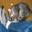
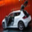
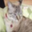

In [12]:
image_test[0:3]['image'].explore()

In [13]:
deep_features_model.predict(image_test[0:3])

dtype: str
Rows: 3
['cat', 'automobile', 'cat']

# Quantitatively evaluate deep features classifier on test data

In [14]:
deep_features_model.evaluate(image_test)

{'accuracy': 0.78525,
 'auc': 0.9358020416666649,
 'confusion_matrix': Columns:
 	target_label	str
 	predicted_label	str
 	count	int
 
 Rows: 16
 
 Data:
 +--------------+-----------------+-------+
 | target_label | predicted_label | count |
 +--------------+-----------------+-------+
 |     cat      |       cat       |  656  |
 |     dog      |    automobile   |   10  |
 |     bird     |       dog       |   68  |
 |  automobile  |       cat       |   10  |
 |     dog      |       bird      |   45  |
 |     cat      |    automobile   |   25  |
 |     bird     |       cat       |  136  |
 |     bird     |    automobile   |   15  |
 |  automobile  |    automobile   |  960  |
 |     dog      |       dog       |  744  |
 +--------------+-----------------+-------+
 [16 rows x 3 columns]
 Note: Only the head of the SFrame is printed.
 You can use print_rows(num_rows=m, num_columns=n) to print more rows and columns.,
 'f1_score': 0.7860134672194241,
 'log_loss': 0.718690718331436,
 'precision